<a href="https://colab.research.google.com/github/JohanMonster/MyRepos/blob/master/IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf

In [5]:
tf.__version__

'1.13.1'

In [6]:
import keras

Using TensorFlow backend.


In [0]:
from keras.datasets import imdb
from keras.layers import *
from keras import *
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
import matplotlib.pyplot as plt
from keras.optimizers import Adam

In [12]:
(train_data,train_labels),(test_data,test_labels)=imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 1s 0us/step


In [21]:
((train_data)[1])

[1,
 194,
 1153,
 194,
 8255,
 78,
 228,
 5,
 6,
 1463,
 4369,
 5012,
 134,
 26,
 4,
 715,
 8,
 118,
 1634,
 14,
 394,
 20,
 13,
 119,
 954,
 189,
 102,
 5,
 207,
 110,
 3103,
 21,
 14,
 69,
 188,
 8,
 30,
 23,
 7,
 4,
 249,
 126,
 93,
 4,
 114,
 9,
 2300,
 1523,
 5,
 647,
 4,
 116,
 9,
 35,
 8163,
 4,
 229,
 9,
 340,
 1322,
 4,
 118,
 9,
 4,
 130,
 4901,
 19,
 4,
 1002,
 5,
 89,
 29,
 952,
 46,
 37,
 4,
 455,
 9,
 45,
 43,
 38,
 1543,
 1905,
 398,
 4,
 1649,
 26,
 6853,
 5,
 163,
 11,
 3215,
 2,
 4,
 1153,
 9,
 194,
 775,
 7,
 8255,
 2,
 349,
 2637,
 148,
 605,
 2,
 8003,
 15,
 123,
 125,
 68,
 2,
 6853,
 15,
 349,
 165,
 4362,
 98,
 5,
 4,
 228,
 9,
 43,
 2,
 1157,
 15,
 299,
 120,
 5,
 120,
 174,
 11,
 220,
 175,
 136,
 50,
 9,
 4373,
 228,
 8255,
 5,
 2,
 656,
 245,
 2350,
 5,
 4,
 9837,
 131,
 152,
 491,
 18,
 2,
 32,
 7464,
 1212,
 14,
 9,
 6,
 371,
 78,
 22,
 625,
 64,
 1382,
 9,
 8,
 168,
 145,
 23,
 4,
 1690,
 15,
 16,
 4,
 1355,
 5,
 28,
 6,
 52,
 154,
 462,
 33,
 89,
 78,
 2

In [18]:
train_labels[0]

1

In [19]:
word_index=imdb.get_word_index()

1646592/1641221 [==============================] - 0s 0us/step


In [0]:
word_index_values=[word_index.values()]

In [36]:
type(word_index_values)

list

In [0]:
j=0
for i in train_data[0]:
  if i in word_index_values and j<10:
    print(j)

In [0]:
reverse_word_index={value:key for key,value in word_index.items()}

In [0]:
decodes_review=" ".join(reverse_word_index.get(i-3,'?') for i in train_data[1])

In [56]:
decodes_review

"? big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an abomination the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is it's just so damn terribly written the clothes are sickening and funny in equal ? the hair is big lots of boobs ? men wear those cut ? shirts that show off their ? sickening that men actually wore them and the music is just ? trash that plays over and over again in almost every scene there is trashy music boobs and ? taking away bodies and the gym still doesn't close for ? all joking aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh at how bad everything was back then"

In [0]:
def vectorize_indexes(sequences,dimension=10000):
  vectorized=np.zeros((len(sequences),dimension))
  for i,j in enumerate(sequences):
    vectorized[i,j]=1
  return np.array(vectorized)

In [0]:
train_vectorized=vectorize_indexes(train_data)
test_vectorized=vectorize_indexes(test_data)

In [64]:
type(train_vectorized)

numpy.ndarray

In [71]:
type(train_labels)

numpy.ndarray

In [0]:
def model():
  x_input=Input((10000,))
  X=Dense(16,activation=tf.nn.relu)(x_input)
  X=Dense(1,activation='sigmoid')(X)
  return Model(inputs=x_input,outputs=X)

In [0]:
imdb_model=model()

In [0]:
adam=Adam(lr=0.001,beta_1=0.9,beta_2=0.999,decay=1e-3)

In [0]:
imdb_model.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])

In [0]:
early_stopping=EarlyStopping(monitor='val_loss',min_delta=0.05,patience=10,mode='min')

In [0]:
reduceLR=ReduceLROnPlateau(monitor='val_loss',mode='min',patience=2,factor=0.5)
callbacks=[early_stopping,reduceLR]

In [115]:
history=imdb_model.fit(train_vectorized,train_labels,epochs=100,batch_size=32,validation_split=0.1,callbacks=callbacks)

Train on 22500 samples, validate on 2500 samples
Epoch 1/100
22500/22500 [==============================] - 5s 218us/step - loss: 0.3222 - acc: 0.8682 - val_loss: 0.2761 - val_acc: 0.8884
Epoch 2/100
22500/22500 [==============================] - 5s 202us/step - loss: 0.1798 - acc: 0.9348 - val_loss: 0.2817 - val_acc: 0.8928
Epoch 3/100
22500/22500 [==============================] - 5s 204us/step - loss: 0.1363 - acc: 0.9545 - val_loss: 0.2962 - val_acc: 0.8912
Epoch 4/100
22500/22500 [==============================] - 5s 203us/step - loss: 0.1061 - acc: 0.9687 - val_loss: 0.3051 - val_acc: 0.8884
Epoch 5/100
22500/22500 [==============================] - 5s 204us/step - loss: 0.0968 - acc: 0.9717 - val_loss: 0.3130 - val_acc: 0.8872
Epoch 6/100
22500/22500 [==============================] - 5s 207us/step - loss: 0.0876 - acc: 0.9761 - val_loss: 0.3176 - val_acc: 0.8872
Epoch 7/100
22500/22500 [==============================] - 5s 221us/step - loss: 0.0844 - acc: 0.9780 - val_loss: 0.3

In [116]:
loss,acc=imdb_model.evaluate(test_vectorized,test_labels)

25000/25000 [==============================] - 2s 89us/step


In [117]:
print(loss,acc)

0.3435969228172302 0.87508


In [99]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc', 'lr'])


In [0]:
def plot():
  val_loss=history.history['val_loss']
  loss=history.history['loss']
  plt.plot(val_loss)
  plt.plot(loss)
  plt.title('losses')
  plt.show()
  lr=history.history['lr']
  plt.plot(lr)
  plt.title('learning_rates')
  plt.show()
  val_acc=history.history['val_acc']
  acc=history.history['acc']
  plt.plot(val_acc)
  plt.plot(acc)
  plt.title("accuracy curves")
  plt.show()

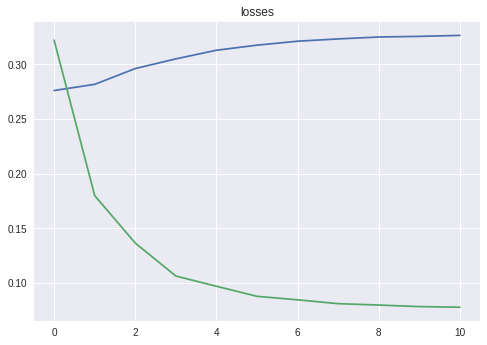

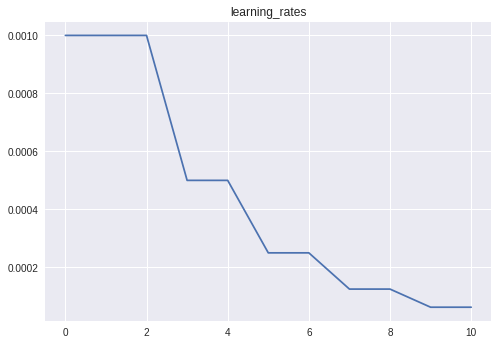

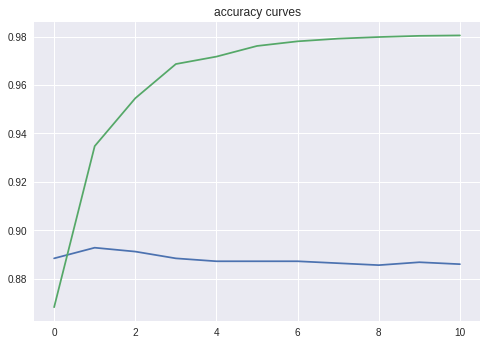

In [118]:
plot()